In [ ]:
from google.colab import drive
drive.mount('/mounted_drive')

Mounted at /mounted_drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Let's load and analyze the diet dataset

In [ ]:
df = pd.read_csv('/mounted_drive/MyDrive/Diet.csv')
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


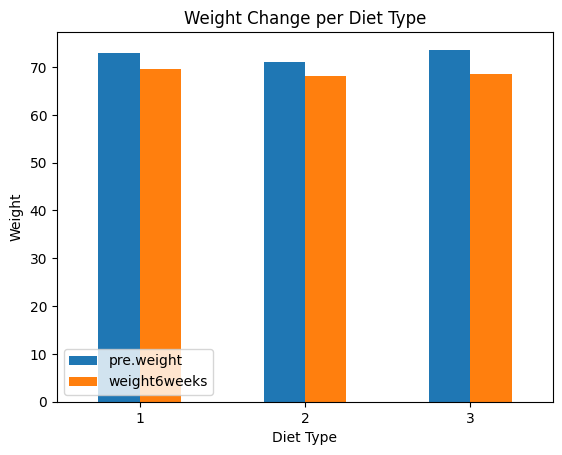

In [ ]:
# Bar Chart
df_weight_per_diet = df.groupby('Diet')[['pre.weight', 'weight6weeks']].mean()    # get the average weight (pre.weight vs. weight6weeks) for each diet type

df_weight_per_diet.plot(kind= 'bar')
plt.title('Weight Change per Diet Type')
plt.ylabel('Weight')
plt.xlabel('Diet Type')
plt.xticks(rotation=0)
plt.legend(loc= 'lower left')    # legend in the lower left corner
plt.show()

Text(0.5, 1.0, 'Weight Change per Diet Type for Males')

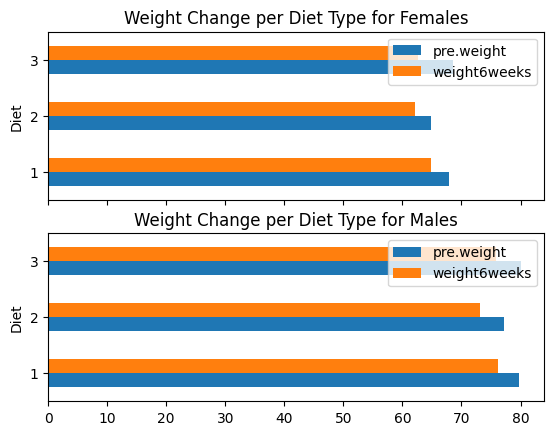

In [ ]:
# Horizontal Bar Chart
# get the average weight (pre.weight vs. weight6weeks) for each diet type for males and females:
df_weight_per_diet_male = df[df['gender'] =='1'].groupby('Diet')[['pre.weight', 'weight6weeks']].mean()    # males
df_weight_per_diet_female = df[df['gender'] =='0'].groupby('Diet')[['pre.weight', 'weight6weeks']].mean()    # females

fig, ax = plt.subplots(2, 1, sharex=True)    # subplots
df_weight_per_diet_female.plot(kind= 'barh', ax=ax[0])    # plot female horizontal barchart
ax[0].set_title('Weight Change per Diet Type for Females')

df_weight_per_diet_male.plot(kind= 'barh', ax=ax[1])     # plot male horizontal barchart
ax[1].set_title('Weight Change per Diet Type for Males')


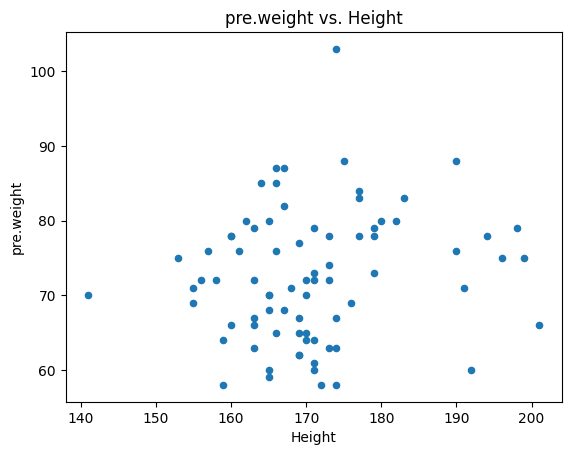

In [ ]:
# scatter plot

df.plot(kind='scatter', x='Height', y='pre.weight')    # scatter plot on height vs pre.weight
plt.title('pre.weight vs. Height')
plt.show()

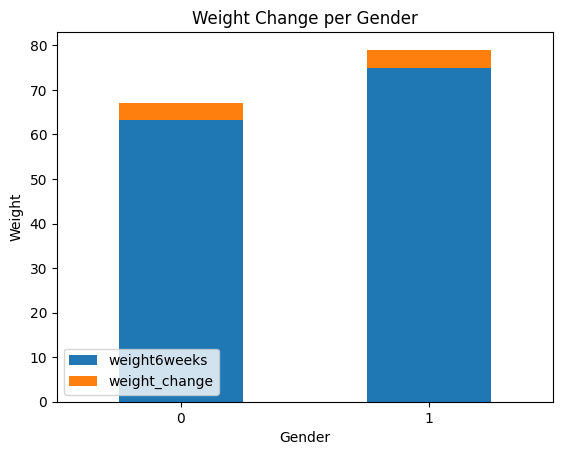

In [ ]:
# stacked bar chart

# add a weight change column
df['weight_change'] = df['pre.weight'] - df['weight6weeks']
valid_genders = df[df.gender.isin(['1', '0'])]    # don't include blank gender
df_weight_per_gender = valid_genders.groupby('gender')[['weight6weeks', 'weight_change']].mean()    # get average weights per gender

df_weight_per_gender.plot(kind='bar', stacked = True)    # stacked bar chart
plt.title('Weight Change per Gender')
plt.ylabel('Weight')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(loc= 'lower left')    # legend in the lower left corner

Text(0.5, 0, 'Age')

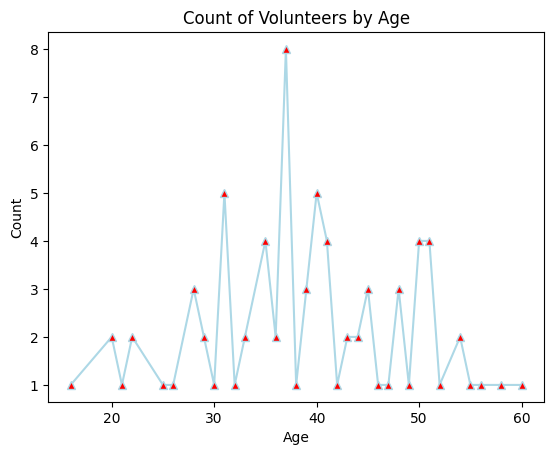

In [ ]:
age_count_df = df['Age'].value_counts()    # counts of people per age
sorted_age_df = age_count_df.sort_index()    # sort the index by age
sorted_age_df.plot(marker= '^', color ='lightblue', markerfacecolor='red')    # line chart with red triangle markers
plt.title('Count of Volunteers by Age')
plt.ylabel('Count')
plt.xlabel('Age')